In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 解决中文乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

In [2]:
data=pd.read_excel('.\PDH_Dataset.xlsx')

In [3]:
data.head()

,催化剂编号,催化剂源自的文章,金属1,金属1（实际）,金属1占比（质量）,金属2,金属2（实际）,金属2占比（质量）,金属3,金属3（实际）,...,Flow rate(C3H8),Flow rate(H2),Flow rate(CO2),Flow rate(protective gas),WHSV(Flow rate),丙烷转化率,丙烯选择性,丙烷转化率（初始）,丙烷转化率（最终）,Y
0,2.0,"Nat. Mater., 2019, 18, 866–873.",Pt,Pt,0.42,Sn,Sn,0.9,K,K,...,24.0,NaN,NaN,76.0,1.7,48.0,96.0,70.0,48.0,0.4608
1,NaN,"Nat. Mater., 2019, 18, 866–873.",Pt,Pt,0.42,Sn,Sn,0.9,K,K,...,24.0,NaN,NaN,76.0,1.7,48.0,97.0,NaN,NaN,0.4656
2,NaN,"Nat. Mater., 2019, 18, 866–873.",Pt,Pt,0.42,Sn,Sn,0.9,K,K,...,24.0,NaN,NaN,76.0,1.7,43.0,96.0,NaN,NaN,0.4128
3,NaN,"Nat. Mater., 2019, 18, 866–873.",Pt,Pt,0.40,NaN,NaN,NaN,NaN,NaN,...,24.0,NaN,NaN,76.0,1.7,4.0,58.0,NaN,NaN,0.0232
4,NaN,"Nat. Mater., 2019, 18, 866–873.",Pt,Pt,0.40,NaN,NaN,NaN,NaN,NaN,...,24.0,NaN,NaN,76.0,1.7,5.0,62.0,NaN,NaN,0.0310


In [4]:
X=data['丙烷转化率']
S=data['丙烯选择性']
d=pd.DataFrame({'X':X,'S':S})

In [6]:
data=pd.concat([data.loc[:,'金属1':'WHSV(Flow rate)'],data.loc[:,'Y']],axis=1)
data

,金属1,金属1（实际）,金属1占比（质量）,金属2,金属2（实际）,金属2占比（质量）,金属3,金属3（实际）,金属3占比（质量）,金属4,...,非H2,Temperature(℃),Time(h),Number of cycles,Flow rate(C3H8),Flow rate(H2),Flow rate(CO2),Flow rate(protective gas),WHSV(Flow rate),Y
0,Pt,Pt,0.42,Sn,Sn,0.9,K,K,0.65,NaN,...,NaN,600,65.00,1.0,24.0,NaN,NaN,76.0,1.70,0.4608
1,Pt,Pt,0.42,Sn,Sn,0.9,K,K,0.65,NaN,...,NaN,600,38.00,2.0,24.0,NaN,NaN,76.0,1.70,0.4656
2,Pt,Pt,0.42,Sn,Sn,0.9,K,K,0.65,NaN,...,NaN,600,58.00,3.0,24.0,NaN,NaN,76.0,1.70,0.4128
3,Pt,Pt,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,600,12.00,1.0,24.0,NaN,NaN,76.0,1.70,0.0232
4,Pt,Pt,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,600,14.00,2.0,24.0,NaN,NaN,76.0,1.70,0.0310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,Pt,Pt,0.10,Ga2O3,Ga,3.0,K,K,0.25,NaN,...,1.0,620,0.25,4.0,100.0,NaN,NaN,NaN,6.47,0.3572
585,Pt,Pt,0.10,Ga2O3,Ga,3.0,K,K,0.25,NaN,...,1.0,620,0.25,5.0,100.0,NaN,NaN,NaN,6.47,0.3572
586,Pt,Pt,0.10,Ga2O3,Ga,3.0,K,K,0.25,NaN,...,1.0,620,0.25,6.0,100.0,NaN,NaN,NaN,6.47,0.3384
587,Pt,Pt,0.10,Ga2O3,Ga,3.0,K,K,0.25,NaN,...,1.0,620,0.25,7.0,100.0,NaN,NaN,NaN,6.47,0.3572


In [7]:
data=data.drop(['金属1','金属2','金属3','金属4'],axis=1)

In [8]:
data

,金属1（实际）,金属1占比（质量）,金属2（实际）,金属2占比（质量）,金属3（实际）,金属3占比（质量）,金属4（实际）,金属4占比（质量）,负载1,负载占比,...,非H2,Temperature(℃),Time(h),Number of cycles,Flow rate(C3H8),Flow rate(H2),Flow rate(CO2),Flow rate(protective gas),WHSV(Flow rate),Y
0,Pt,0.42,Sn,0.9,K,0.65,NaN,NaN,MFI,98.03,...,NaN,600,65.00,1.0,24.0,NaN,NaN,76.0,1.70,0.4608
1,Pt,0.42,Sn,0.9,K,0.65,NaN,NaN,MFI,98.03,...,NaN,600,38.00,2.0,24.0,NaN,NaN,76.0,1.70,0.4656
2,Pt,0.42,Sn,0.9,K,0.65,NaN,NaN,MFI,98.03,...,NaN,600,58.00,3.0,24.0,NaN,NaN,76.0,1.70,0.4128
3,Pt,0.40,NaN,NaN,NaN,NaN,NaN,NaN,MFI,99.60,...,NaN,600,12.00,1.0,24.0,NaN,NaN,76.0,1.70,0.0232
4,Pt,0.40,NaN,NaN,NaN,NaN,NaN,NaN,MFI,99.60,...,NaN,600,14.00,2.0,24.0,NaN,NaN,76.0,1.70,0.0310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,4.0,100.0,NaN,NaN,NaN,6.47,0.3572
585,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,5.0,100.0,NaN,NaN,NaN,6.47,0.3572
586,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,6.0,100.0,NaN,NaN,NaN,6.47,0.3384
587,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,7.0,100.0,NaN,NaN,NaN,6.47,0.3572


In [9]:
data1 = list(set(pd.concat([data.iloc[:, 0], data.iloc[:, 2], data.iloc[:, 4], data.iloc[:, 6]])))

In [10]:
len(data1)

14

In [11]:
data_1 = pd.DataFrame(np.zeros((589, 14)), columns=data1)

In [12]:
data_1

,NaN,Mg,Na,Pt,V,Cr,Sn,Zr,Zn,Co,Ni,In,Ga,K
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
num_1 = 0
for i in data.iloc[:, 0]:
    if i in data1:
        index_2 = data1.index(i)
        index_1 = num_1
        data_1.iloc[index_1, index_2] = data.iloc[num_1, 1]
        num_1 = num_1 + 1
num_1 = 0
for i in data.iloc[:, 2]:
    if i in data1:
        index_2 = data1.index(i)
        index_1 = num_1
        data_1.iloc[index_1, index_2] = data.iloc[num_1, 3]
        num_1 = num_1 + 1
num_1 = 0
for i in data.iloc[:, 4]:
    if i in data1:
        index_2 = data1.index(i)
        index_1 = num_1
        data_1.iloc[index_1, index_2] = data.iloc[num_1, 5]
        num_1 = num_1 + 1
num_1 = 0
for i in data.iloc[:, 6]:
    if i in data1:
        index_2 = data1.index(i)
        index_1 = num_1
        data_1.iloc[index_1, index_2] = data.iloc[num_1, 7]
        num_1 = num_1 + 1
data_1 = data_1.dropna(axis=1)

In [14]:
data_1

,Mg,Na,Pt,V,Cr,Sn,Zr,Zn,Co,Ni,In,Ga,K
0,0.0,0.0,0.42,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.65
1,0.0,0.0,0.42,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.65
2,0.0,0.0,0.42,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.65
3,0.0,0.0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,0.0,0.0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.25
585,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.25
586,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.25
587,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.25


In [15]:
data

,金属1（实际）,金属1占比（质量）,金属2（实际）,金属2占比（质量）,金属3（实际）,金属3占比（质量）,金属4（实际）,金属4占比（质量）,负载1,负载占比,...,非H2,Temperature(℃),Time(h),Number of cycles,Flow rate(C3H8),Flow rate(H2),Flow rate(CO2),Flow rate(protective gas),WHSV(Flow rate),Y
0,Pt,0.42,Sn,0.9,K,0.65,NaN,NaN,MFI,98.03,...,NaN,600,65.00,1.0,24.0,NaN,NaN,76.0,1.70,0.4608
1,Pt,0.42,Sn,0.9,K,0.65,NaN,NaN,MFI,98.03,...,NaN,600,38.00,2.0,24.0,NaN,NaN,76.0,1.70,0.4656
2,Pt,0.42,Sn,0.9,K,0.65,NaN,NaN,MFI,98.03,...,NaN,600,58.00,3.0,24.0,NaN,NaN,76.0,1.70,0.4128
3,Pt,0.40,NaN,NaN,NaN,NaN,NaN,NaN,MFI,99.60,...,NaN,600,12.00,1.0,24.0,NaN,NaN,76.0,1.70,0.0232
4,Pt,0.40,NaN,NaN,NaN,NaN,NaN,NaN,MFI,99.60,...,NaN,600,14.00,2.0,24.0,NaN,NaN,76.0,1.70,0.0310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,4.0,100.0,NaN,NaN,NaN,6.47,0.3572
585,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,5.0,100.0,NaN,NaN,NaN,6.47,0.3572
586,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,6.0,100.0,NaN,NaN,NaN,6.47,0.3384
587,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,7.0,100.0,NaN,NaN,NaN,6.47,0.3572


In [16]:
data_use=pd.concat([data_1,data.loc[:,'负载1':'Y']],axis=1)

In [17]:
data_use

,Mg,Na,Pt,V,Cr,Sn,Zr,Zn,Co,Ni,...,非H2,Temperature(℃),Time(h),Number of cycles,Flow rate(C3H8),Flow rate(H2),Flow rate(CO2),Flow rate(protective gas),WHSV(Flow rate),Y
0,0.0,0.0,0.42,0.0,0.0,0.9,0.0,0.0,0.0,0.0,...,NaN,600,65.00,1.0,24.0,NaN,NaN,76.0,1.70,0.4608
1,0.0,0.0,0.42,0.0,0.0,0.9,0.0,0.0,0.0,0.0,...,NaN,600,38.00,2.0,24.0,NaN,NaN,76.0,1.70,0.4656
2,0.0,0.0,0.42,0.0,0.0,0.9,0.0,0.0,0.0,0.0,...,NaN,600,58.00,3.0,24.0,NaN,NaN,76.0,1.70,0.4128
3,0.0,0.0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,600,12.00,1.0,24.0,NaN,NaN,76.0,1.70,0.0232
4,0.0,0.0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,600,14.00,2.0,24.0,NaN,NaN,76.0,1.70,0.0310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,620,0.25,4.0,100.0,NaN,NaN,NaN,6.47,0.3572
585,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,620,0.25,5.0,100.0,NaN,NaN,NaN,6.47,0.3572
586,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,620,0.25,6.0,100.0,NaN,NaN,NaN,6.47,0.3384
587,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,620,0.25,7.0,100.0,NaN,NaN,NaN,6.47,0.3572


In [18]:
data_use.to_excel('use.xlsx')

In [19]:
data

,金属1（实际）,金属1占比（质量）,金属2（实际）,金属2占比（质量）,金属3（实际）,金属3占比（质量）,金属4（实际）,金属4占比（质量）,负载1,负载占比,...,非H2,Temperature(℃),Time(h),Number of cycles,Flow rate(C3H8),Flow rate(H2),Flow rate(CO2),Flow rate(protective gas),WHSV(Flow rate),Y
0,Pt,0.42,Sn,0.9,K,0.65,NaN,NaN,MFI,98.03,...,NaN,600,65.00,1.0,24.0,NaN,NaN,76.0,1.70,0.4608
1,Pt,0.42,Sn,0.9,K,0.65,NaN,NaN,MFI,98.03,...,NaN,600,38.00,2.0,24.0,NaN,NaN,76.0,1.70,0.4656
2,Pt,0.42,Sn,0.9,K,0.65,NaN,NaN,MFI,98.03,...,NaN,600,58.00,3.0,24.0,NaN,NaN,76.0,1.70,0.4128
3,Pt,0.40,NaN,NaN,NaN,NaN,NaN,NaN,MFI,99.60,...,NaN,600,12.00,1.0,24.0,NaN,NaN,76.0,1.70,0.0232
4,Pt,0.40,NaN,NaN,NaN,NaN,NaN,NaN,MFI,99.60,...,NaN,600,14.00,2.0,24.0,NaN,NaN,76.0,1.70,0.0310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,4.0,100.0,NaN,NaN,NaN,6.47,0.3572
585,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,5.0,100.0,NaN,NaN,NaN,6.47,0.3572
586,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,6.0,100.0,NaN,NaN,NaN,6.47,0.3384
587,Pt,0.10,Ga,3.0,K,0.25,NaN,NaN,Al2O3,96.65,...,1.0,620,0.25,7.0,100.0,NaN,NaN,NaN,6.47,0.3572


In [20]:
data2 = list(set(pd.concat([data.iloc[:, 8], data.iloc[:, 10]])))

In [21]:
len(data2)

21

In [22]:
data_2 = pd.DataFrame(np.zeros((589, 21)), columns=data2)

In [23]:
num_1 = 0
for i in data.iloc[:, 8]:
    if i in data2:
        index_2 = data2.index(i)
        index_1 = num_1
        data_2.iloc[index_1, index_2] = data.iloc[num_1, 9]
        num_1 = num_1 + 1
num_1 = 0
for i in data.iloc[:, 10]:
    if i in data2:
        index_2 = data2.index(i)
        index_1 = num_1
        data_2.iloc[index_1, index_2] = data.iloc[num_1, 11]
        num_1 = num_1 + 1
data_2 = data_2.dropna(axis=1)

In [24]:
data_2

,SBA-15,MFI,AlSBA-15,Mg（Al）O,MCM-41,HZSM-5,SiO2,SiBeta,Mg（Sn）（Al）O,Sn,MgO,ZSM-5,Zn,Mg,CMK-3,Beta,S-1,Al2O3,ZrO2,SBA-1
0,0.0,98.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1,0.0,98.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,0.0,98.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,0.0,99.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,0.0,99.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.65,0.0,0.0
585,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.65,0.0,0.0
586,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.65,0.0,0.0
587,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.65,0.0,0.0


In [26]:
data_use=pd.concat([data_1,data_2,data.loc[:,'Temperature(℃)':'Y']],axis=1)

In [27]:
data_use

,Mg,Na,Pt,V,Cr,Sn,Zr,Zn,Co,Ni,...,SBA-1,Temperature(℃),Time(h),Number of cycles,Flow rate(C3H8),Flow rate(H2),Flow rate(CO2),Flow rate(protective gas),WHSV(Flow rate),Y
0,0.0,0.0,0.42,0.0,0.0,0.9,0.0,0.0,0.0,0.0,...,0.0,600,65.00,1.0,24.0,NaN,NaN,76.0,1.70,0.4608
1,0.0,0.0,0.42,0.0,0.0,0.9,0.0,0.0,0.0,0.0,...,0.0,600,38.00,2.0,24.0,NaN,NaN,76.0,1.70,0.4656
2,0.0,0.0,0.42,0.0,0.0,0.9,0.0,0.0,0.0,0.0,...,0.0,600,58.00,3.0,24.0,NaN,NaN,76.0,1.70,0.4128
3,0.0,0.0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,600,12.00,1.0,24.0,NaN,NaN,76.0,1.70,0.0232
4,0.0,0.0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,600,14.00,2.0,24.0,NaN,NaN,76.0,1.70,0.0310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,620,0.25,4.0,100.0,NaN,NaN,NaN,6.47,0.3572
585,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,620,0.25,5.0,100.0,NaN,NaN,NaN,6.47,0.3572
586,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,620,0.25,6.0,100.0,NaN,NaN,NaN,6.47,0.3384
587,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,620,0.25,7.0,100.0,NaN,NaN,NaN,6.47,0.3572


In [28]:
data_use['Number of cycles']=data_use['Number of cycles'].fillna(1)

In [29]:
data_use

,Mg,Na,Pt,V,Cr,Sn,Zr,Zn,Co,Ni,...,SBA-1,Temperature(℃),Time(h),Number of cycles,Flow rate(C3H8),Flow rate(H2),Flow rate(CO2),Flow rate(protective gas),WHSV(Flow rate),Y
0,0.0,0.0,0.42,0.0,0.0,0.9,0.0,0.0,0.0,0.0,...,0.0,600,65.00,1.0,24.0,NaN,NaN,76.0,1.70,0.4608
1,0.0,0.0,0.42,0.0,0.0,0.9,0.0,0.0,0.0,0.0,...,0.0,600,38.00,2.0,24.0,NaN,NaN,76.0,1.70,0.4656
2,0.0,0.0,0.42,0.0,0.0,0.9,0.0,0.0,0.0,0.0,...,0.0,600,58.00,3.0,24.0,NaN,NaN,76.0,1.70,0.4128
3,0.0,0.0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,600,12.00,1.0,24.0,NaN,NaN,76.0,1.70,0.0232
4,0.0,0.0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,600,14.00,2.0,24.0,NaN,NaN,76.0,1.70,0.0310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,620,0.25,4.0,100.0,NaN,NaN,NaN,6.47,0.3572
585,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,620,0.25,5.0,100.0,NaN,NaN,NaN,6.47,0.3572
586,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,620,0.25,6.0,100.0,NaN,NaN,NaN,6.47,0.3384
587,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,620,0.25,7.0,100.0,NaN,NaN,NaN,6.47,0.3572


In [ ]:
# 可选择删除循环
# data_use.drop(['循环'],axis=1,inplace=True)
# data_use

In [31]:
data_use['Time(h)'].fillna(data_use['Time(h)'].mean(),inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_26344\3126544320.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_use['Time(h)'].fillna(data_use['Time(h)'].mean(),inplace=True)


In [32]:
data_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Mg                         589 non-null    float64
 1   Na                         589 non-null    float64
 2   Pt                         589 non-null    float64
 3   V                          589 non-null    float64
 4   Cr                         589 non-null    float64
 5   Sn                         589 non-null    float64
 6   Zr                         589 non-null    float64
 7   Zn                         589 non-null    float64
 8   Co                         589 non-null    float64
 9   Ni                         589 non-null    float64
 10  In                         589 non-null    float64
 11  Ga                         589 non-null    float64
 12  K                          589 non-null    float64
 13  SBA-15                     589 non-null    float64

In [33]:
data_use['WHSV(Flow rate)'].fillna(data_use['WHSV(Flow rate)'].mean(),inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_26344\3292774340.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_use['WHSV(Flow rate)'].fillna(data_use['WHSV(Flow rate)'].mean(),inplace=True)


In [34]:
data_use.fillna('0',inplace=True)
data_use

C:\Users\Dell\AppData\Local\Temp\ipykernel_26344\2294768189.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_use.fillna('0',inplace=True)


,Mg,Na,Pt,V,Cr,Sn,Zr,Zn,Co,Ni,...,SBA-1,Temperature(℃),Time(h),Number of cycles,Flow rate(C3H8),Flow rate(H2),Flow rate(CO2),Flow rate(protective gas),WHSV(Flow rate),Y
0,0.0,0.0,0.42,0.0,0.0,0.9,0.0,0.0,0.0,0.0,...,0.0,600,65.00,1.0,24.0,0,0,76.0,1.70,0.4608
1,0.0,0.0,0.42,0.0,0.0,0.9,0.0,0.0,0.0,0.0,...,0.0,600,38.00,2.0,24.0,0,0,76.0,1.70,0.4656
2,0.0,0.0,0.42,0.0,0.0,0.9,0.0,0.0,0.0,0.0,...,0.0,600,58.00,3.0,24.0,0,0,76.0,1.70,0.4128
3,0.0,0.0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,600,12.00,1.0,24.0,0,0,76.0,1.70,0.0232
4,0.0,0.0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,600,14.00,2.0,24.0,0,0,76.0,1.70,0.0310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,620,0.25,4.0,100.0,0,0,0,6.47,0.3572
585,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,620,0.25,5.0,100.0,0,0,0,6.47,0.3572
586,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,620,0.25,6.0,100.0,0,0,0,6.47,0.3384
587,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,620,0.25,7.0,100.0,0,0,0,6.47,0.3572


In [ ]:
# data_3=data_use.replace(0,np.nan)
# data_3

In [ ]:
# data_3.info()

In [35]:
data_use.to_excel('./use.xlsx')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


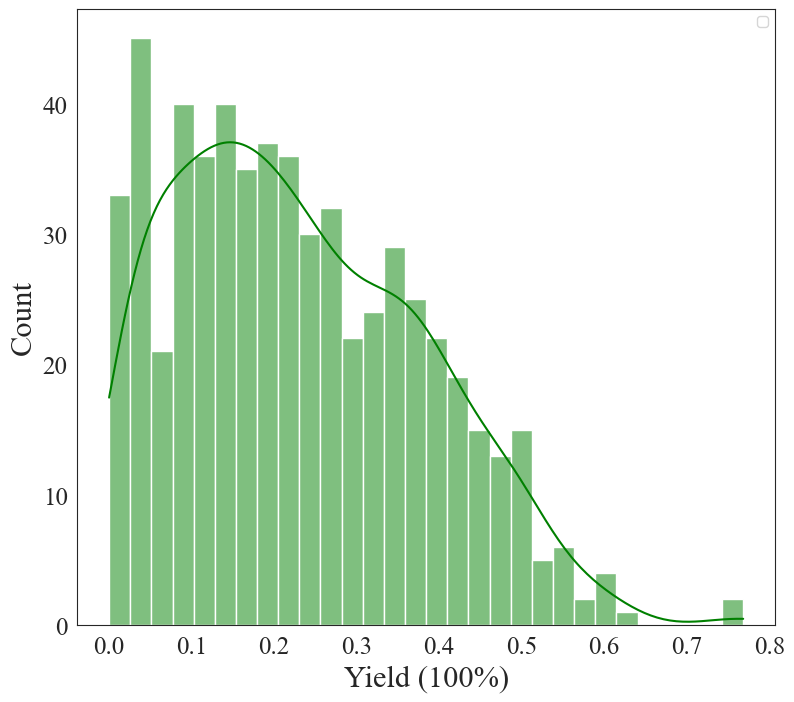

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set_style("white")
plt.figure(figsize=(9,8))
sns.histplot(data_use['Y'],color='g',bins=30,kde=True)
plt.xlabel('Yield (100%)',fontsize=22,font=Path('..\TimesNewRoman.ttf'))
plt.ylabel('Count',fontsize=22,font=Path('..\TimesNewRoman.ttf'))
plt.xticks(fontsize=18,fontname='Times New Roman')
plt.yticks(fontsize=18,fontname='Times New Roman')
plt.legend()
plt.show()

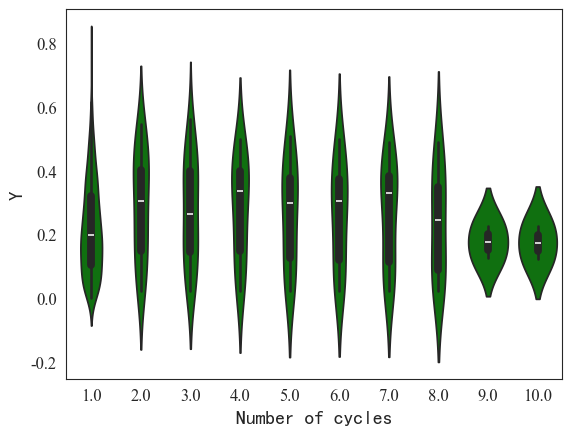

In [39]:
sns.set_style("white",{"font.sans-serif":['simhei','Droid Sans Fallback']})
sns.violinplot(x="Number of cycles",y="Y",data=data_use,color='g')
plt.xlabel('Number of cycles',fontsize=14)
plt.ylabel('Y',fontsize=14)
plt.xticks(fontsize=12,fontname='Times New Roman')
plt.yticks(fontsize=12,fontname='Times New Roman')
plt.show()

NameError: name 'feat' is not defined

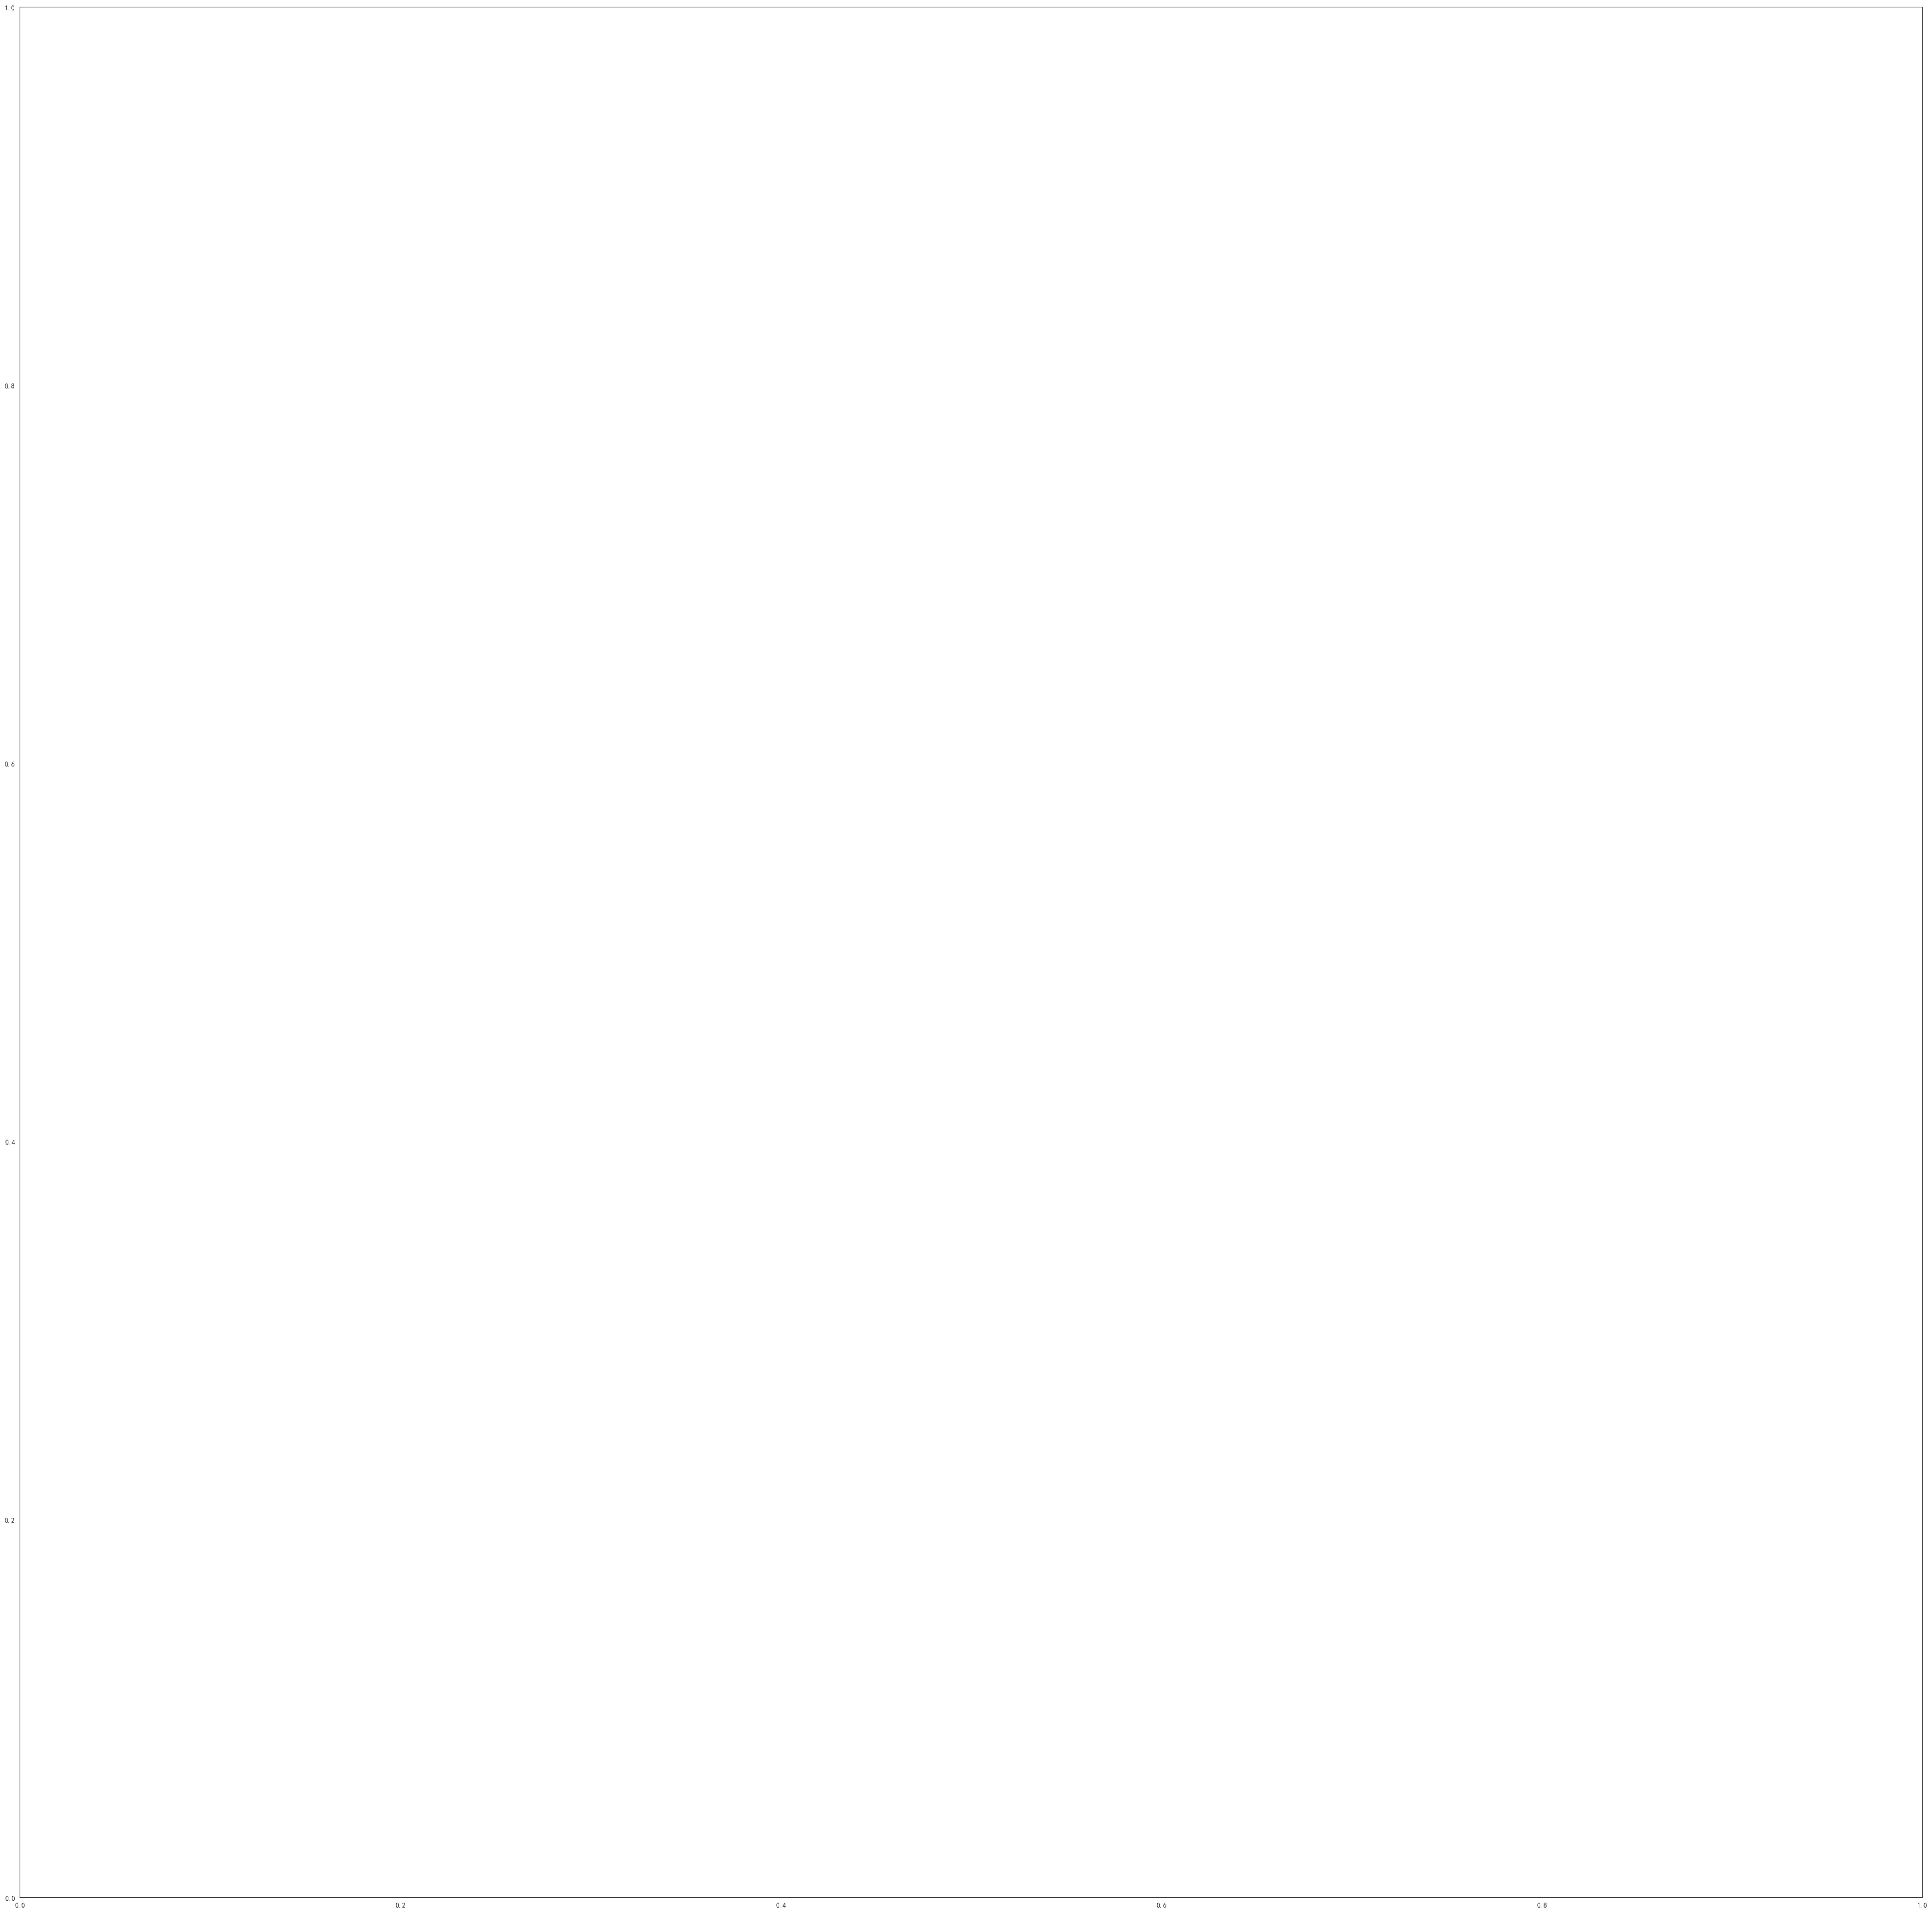

In [40]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(feat.corr(method='pearson'),linewidths=0.1,vmax=0.8, square=True,linecolor='white', 
            annot=True,annot_kws={'fontsize':18},cbar=True,cbar_kws={"shrink": 0.8})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.title('皮尔逊热力图',fontsize=80)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=40)
plt.show()